## *SriLankan Weekly Dengue Data


#### Import necessay libraries.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from ipywidgets import interact, widgets

#### Install the necessary library for mapping

In [65]:
!pip install folium pandas
!pip install ipywidgets

#### Import the csv file as a pandas dataframe.

In [66]:
df = pd.read_csv('data.csv')

In [67]:
df.head()

,year,week,start.date,end.date,district,cases
0,2006,52,2006-12-23,2006-12-29,Colombo,71
1,2006,52,2006-12-23,2006-12-29,Gampaha,12
2,2006,52,2006-12-23,2006-12-29,Kalutara,12
3,2006,52,2006-12-23,2006-12-29,Kandy,20
4,2006,52,2006-12-23,2006-12-29,Matale,4


#### Data preparation

In [68]:
# Check for null values
print(df.isnull().sum())

year          0
week          0
start.date    0
end.date      0
district      0
cases         0
dtype: int64


In [69]:
print(df.duplicated().sum())

0


In [70]:
unique_districts = df['district'].unique()
unique_districts

array(['Colombo', 'Gampaha', 'Kalutara', 'Kandy', 'Matale', 'NuwaraEliya',
       'Galle', 'Hambanthota', 'Matara', 'Jaffna', 'Kilinochchi',
       'Mannar', 'Vavuniya', 'Mullaitivu', 'Batticaloa', 'Ampara',
       'Trincomalee', 'Kurunegala', 'Puttalam', 'Anuradhapura',
       'Polonnaruwa', 'Badulla', 'Monaragala', 'Ratnapura', 'Kegalle',
       'Kalmune'], dtype=object)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23882 entries, 0 to 23881
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        23882 non-null  int64 
 1   week        23882 non-null  int64 
 2   start.date  23882 non-null  object
 3   end.date    23882 non-null  object
 4   district    23882 non-null  object
 5   cases       23882 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [72]:
df['cases'].describe()

,cases
count,23882.000000
mean,31.211079
std,81.997804
min,0.000000
25%,2.000000
50%,8.000000
75%,28.000000
max,2631.000000


#### District-wise Dengue Burden in Sri Lanka

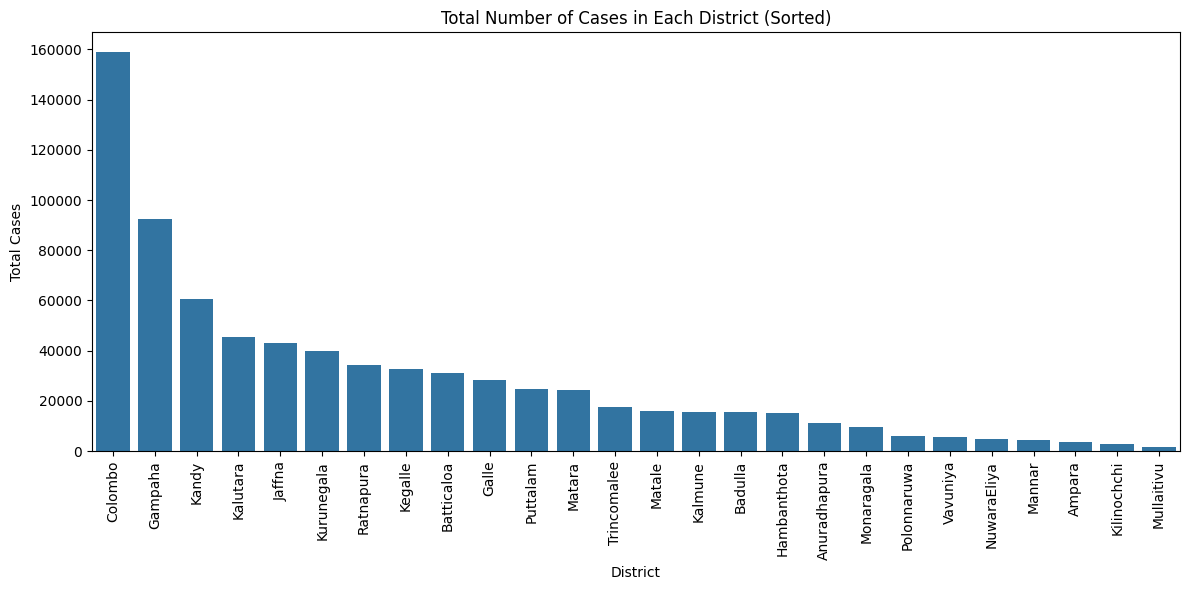

In [73]:
district_cases = df.groupby('district')['cases'].sum()

district_cases_sorted = district_cases.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=district_cases_sorted.index, y=district_cases_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Total Cases')
plt.title('Total Number of Cases in Each District (Sorted)')
plt.tight_layout()
plt.show()

In [74]:
summary_measures = df.groupby('district')['cases'].agg(['sum', 'mean', 'median', 'min', 'max', 'std'])
summary_measures = summary_measures.rename(columns={
    'sum': 'Total Cases',
    'mean': 'Mean Cases',
    'median': 'Median Cases',
    'min': 'Minimum Cases',
    'max': 'Maximum Cases',
    'std': 'Standard Deviation'
})

summary_measures_sorted = summary_measures.sort_values(by='Total Cases', ascending=False)

print(summary_measures_sorted)


              Total Cases  Mean Cases  Median Cases  Minimum Cases  \
district                                                             
Colombo            158853  172.666304         112.0              0   
Gampaha             92436  100.473913          49.0              0   
Kandy               60735   66.016304          34.0              0   
Kalutara            45437   49.388043          29.0              0   
Jaffna              43218   46.976087          17.0              0   
Kurunegala          39838   43.302174          25.0              0   
Ratnapura           34463   37.459783          22.0              0   
Kegalle             32870   35.728261          19.0              0   
Batticaloa          31196   33.908696          14.0              0   
Galle               28297   30.757609          15.0              0   
Puttalam            24710   26.858696          10.0              0   
Matara              24288   26.400000          14.0              0   
Trincomalee         

#### Visualizing Yearly Dengue Case Trends in Sri Lanka


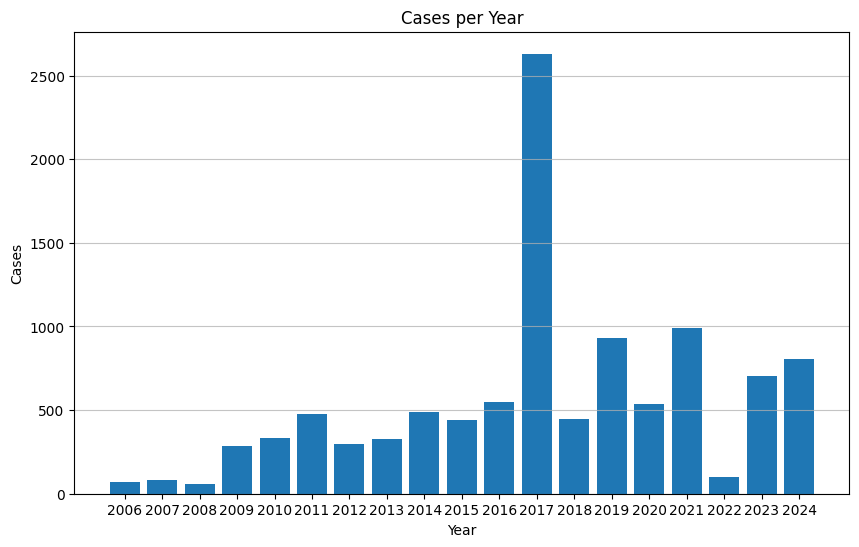

In [75]:
df['year'] = df['year'].astype(int)

plt.figure(figsize=(10, 6))
plt.bar(df['year'], df['cases'])
plt.xlabel('Year')
plt.ylabel('Cases')
plt.title('Cases per Year')
plt.xticks(df['year'].unique())
plt.grid(axis='y', alpha=0.75)
plt.show()

      min   max        mean  median         std
year                                           
2006    0    71    6.423077     1.0   14.311319
2007    0    80    4.451923     1.0    8.776056
2008    0    56    4.094675     1.0    6.916863
2009    0   288   19.398403     6.0   34.098135
2010    0   334   18.495562     8.0   31.777911
2011    0   475   16.011095     5.0   36.509359
2012    0   297   17.401627     5.0   31.895612
2013    0   329   16.558432     7.0   31.578898
2014    0   491   26.119822     9.0   54.074027
2015    0   439   16.503698     5.0   36.578014
2016    0   547   25.538462    10.0   52.825774
2017    0  2631  129.206361    53.0  236.680731
2018    0   449   37.959320    19.0   54.379201
2019    0   931   70.103550    23.0  121.325036
2020    0   535   23.832840     5.0   53.788179
2021    0   990   20.158926     5.0   62.161842
2022    0   100   23.427515    15.0   24.211853
2023    0   706   52.866124    28.0   78.373920
2024    0   805   47.362720    20.0   83

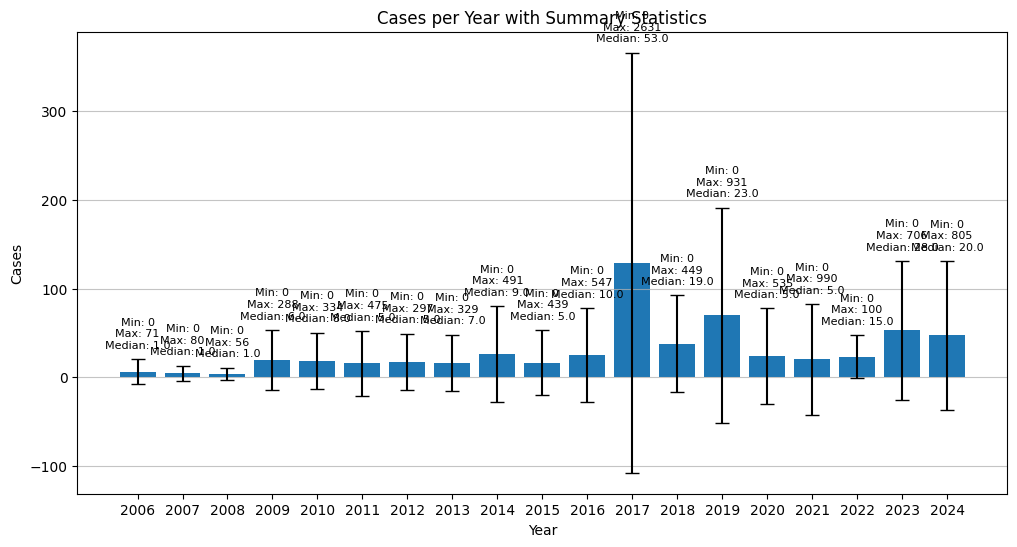

In [76]:
summary_stats = df.groupby('year')['cases'].agg(['min', 'max', 'mean', 'median', 'std'])

print(summary_stats)

plt.figure(figsize=(12, 6))
plt.bar(summary_stats.index, summary_stats['mean'], yerr=summary_stats['std'], capsize=5)
plt.xlabel('Year')
plt.ylabel('Cases')
plt.title('Cases per Year with Summary Statistics')
plt.xticks(summary_stats.index)
plt.grid(axis='y', alpha=0.75)


for year in summary_stats.index:
    plt.text(year, summary_stats.loc[year, 'mean'] + summary_stats.loc[year, 'std'] + 10,
             f'Min: {summary_stats.loc[year, "min"]}\nMax: {summary_stats.loc[year, "max"]}\nMedian: {summary_stats.loc[year, "median"]}',
             ha='center', va='bottom', fontsize=8)

plt.show()

#### Add Latitude and Longitude for Districts

In [77]:
# Dictionary of district coordinates in Sri Lanka
district_coords = {
    'Colombo': [6.9271, 79.8612],
    'Gampaha': [7.0917, 80.0144],
    'Kalutara': [6.5843, 79.9607],
    'Kandy': [7.2906, 80.6337],
    'Matale': [7.4671, 80.6234],
    'NuwaraEliya': [6.9497, 80.7891],
    'Galle': [6.0535, 80.2210],
    'Hambanthota': [6.1246, 81.1185],
    'Matara': [5.9549, 80.5540],
    'Jaffna': [9.6615, 80.0255],
    'Kilinochchi': [9.3808, 80.4071],
    'Mannar': [8.9770, 79.9042],
    'Vavuniya': [8.7546, 80.4982],
    'Mullaitivu': [9.2678, 80.8151],
    'Batticaloa': [7.7305, 81.7086],
    'Ampara': [7.3028, 81.6745],
    'Trincomalee': [8.5874, 81.2152],
    'Kurunegala': [7.4818, 80.3669],
    'Puttalam': [8.0351, 79.8393],
    'Anuradhapura': [8.3114, 80.4037],
    'Polonnaruwa': [7.9403, 81.0030],
    'Badulla': [6.9896, 81.0559],
    'Monaragala': [6.8724, 81.3509],
    'Ratnapura': [6.7056, 80.3847],
    'Kegalle': [7.2513, 80.3404],
    'Kalmune': [7.4167, 81.8167]
}

# Map coordinates to the dataset
df['latitude'] = df['district'].map(lambda x: district_coords[x][0])
df['longitude'] = df['district'].map(lambda x: district_coords[x][1])


#### Exploring Dengue Case Distribution with an Interactive Bubble Map

- Follwing interactive map allows you to visualize the distribution of cases over time. Use the dropdown menus to select a specific year and week number. The map will then update to display the corresponding data, providing insights into the geographical spread of cases during that period. Explore different timeframes to observe trends and patterns in the data.

In [78]:
def create_bubble_map(year, week):
    filtered_data = df[(df['year'] == year) & (df['week'] == week)]

    sri_lanka_map = folium.Map(location=[7.8731, 80.7718], zoom_start=8)

    for _, row in filtered_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row['cases'] / 10,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=f"{row['district']}: {row['cases']} cases"
        ).add_to(sri_lanka_map)

    sri_lanka_map.save('dengue_bubble_map.html')
    return sri_lanka_map

year_dropdown = widgets.Dropdown(
    options=sorted(df['year'].unique()),
    description='Year:',
    value=df['year'].min()
)

week_dropdown = widgets.Dropdown(
    options=sorted(df['week'].unique()),
    description='Week:',
    value=df['week'].min()
)

interact(create_bubble_map, year=year_dropdown, week=week_dropdown)


interactive(children=(Dropdown(description='Year:', options=(2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2…

<function __main__.create_bubble_map(year, week)>

#### Weekly Dengue Case Trends in Sri Lanka: A District-wise Analysis

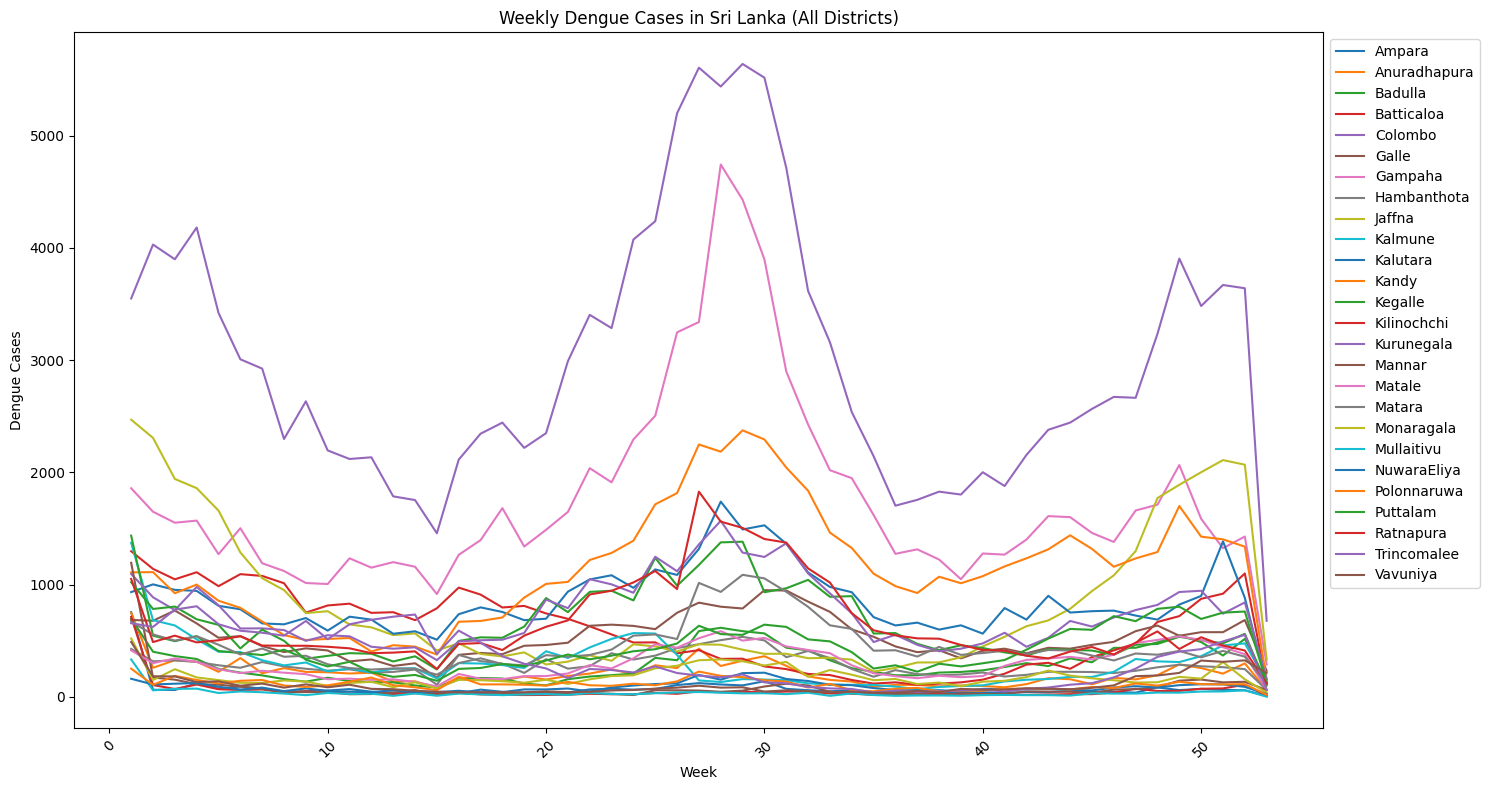

In [79]:
weekly_dengue = df.groupby(['district', 'week'])['cases'].sum().reset_index()

plt.figure(figsize=(15, 8))
for district in weekly_dengue['district'].unique():
    district_data = weekly_dengue[weekly_dengue['district'] == district]
    plt.plot(district_data['week'], district_data['cases'], label=district)
plt.xlabel('Week')
plt.ylabel('Dengue Cases')
plt.title('Weekly Dengue Cases in Sri Lanka (All Districts)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


-  It might be observed peaks in dengue cases during the monsoon seasons (May-June and October-November) in most districts.

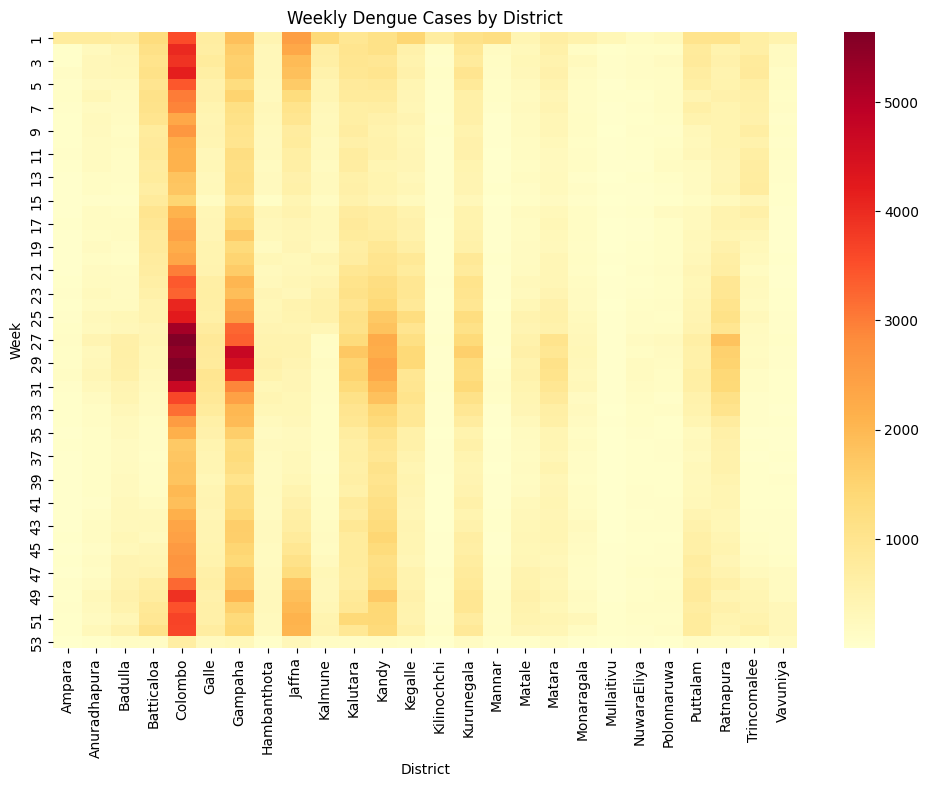

In [80]:
heatmap_data = df.pivot_table(index="week", columns="district", values="cases", aggfunc='sum')  # Use pivot_table with aggfunc='sum'

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=False, fmt=".0f") # YlOrRd is a good colormap for counts
plt.title("Weekly Dengue Cases by District")
plt.xlabel("District")
plt.ylabel("Week")
plt.show()

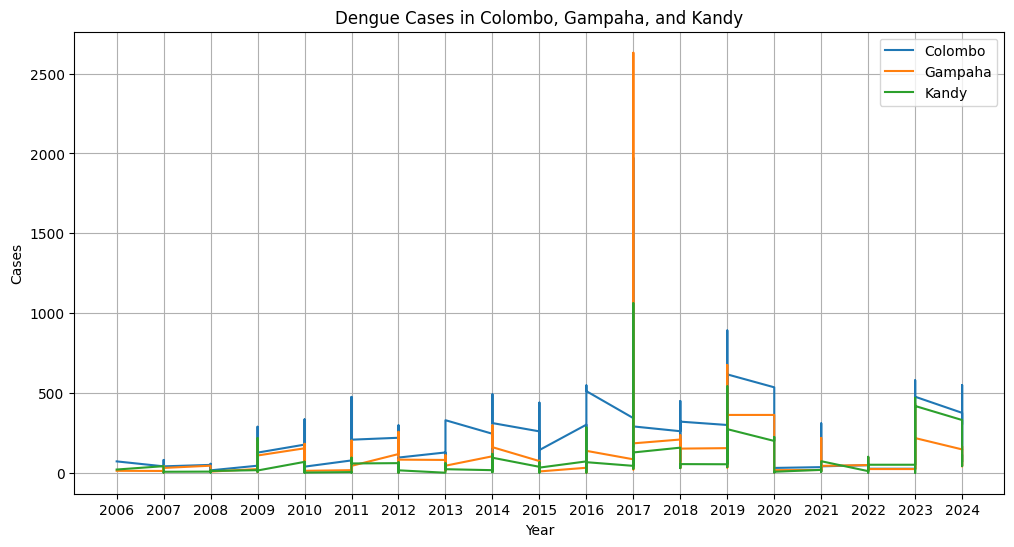

In [81]:
districts = ['Colombo', 'Gampaha', 'Kandy']
filtered_df = df[df['district'].isin(districts)]

plt.figure(figsize=(12, 6))

for district in districts:
    district_data = filtered_df[filtered_df['district'] == district]
    plt.plot(district_data['year'], district_data['cases'], label=district)

plt.xlabel('Year')
plt.ylabel('Cases')
plt.title('Dengue Cases in Colombo, Gampaha, and Kandy')
plt.legend()

plt.xticks(filtered_df['year'].unique())

plt.grid(True)
plt.show()